In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [63]:
def in_core_time(pipe_mdot: float,
                 fuel_temperature: float = 700,
                 comp_msbr: bool = True,
                 return_velocity: bool = False,
                 return_densfunc: bool = False):
    '''
    Parameters:
        pipe_flowrate: The flow rate of the core inlet pipe,  kg/s

    Returns: 
        Time of fuel in core,  s
    Assumptions:
        Incompresible, constant density, steady state, no viscosity

    Equation:
        Q_p = Q_f
        v_p A_p = v_f A_f
    '''
    msbr_mdot = 9.48e7 / 3600 * 0.45359237  # lb/hr -> kg/s  : Figure 2.1
    Uflibe_density = np.array([3283.9, 3330.4, 3376.9])[::-1]
    Uflibe_temps = np.array([978, 908, 839])[::-1]-273.15 # K -> C
    density_func = sp.interpolate.interp1d(Uflibe_temps, Uflibe_density,fill_value='extrapolate')
    fuel_density = density_func(fuel_temperature)
    
    core_height = 3.96 # m
    
    fuel_area =  30.4 / core_height   # fuel volume in core / core height : Table S.1

    velocity = pipe_mdot / fuel_density / fuel_area

    if return_velocity:
        return core_height / velocity, velocity
        
    if comp_msbr:
        msbr_vel = msbr_mdot / Uflibe_density[0] / fuel_area
        print('Model\tvelocity \t\t time')
        print('--------------------------------------------------')
        print(f'MSBR \t{msbr_vel} \t {core_height/msbr_vel}')
        print('--------------------------------------------------')
        print(f'Ours \t{velocity} \t {core_height/velocity}')

    if return_densfunc:
        return core_height / velocity, density_func
        
    return core_height / velocity

In [55]:
mdots = np.linspace(1, 9.48e7 / 3600 * 0.45359237,1000)
temps = np.array([500, 600, 700, 800, 900])

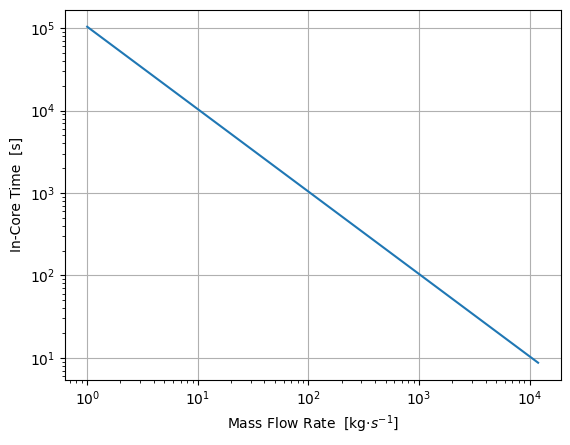

In [66]:
plt.loglog(mdots, in_core_time(mdots, fuel_temperature=temp, comp_msbr=False))
plt.xlabel('Mass Flow Rate  [kg$\cdot s^{-1}$]')
plt.ylabel('In-Core Time  [s]')
plt.grid()
plt.show()